1) A researcher wants to test whether the average height of male students in a university is different from the national average of 175 cm. A random sample of 50 students has a mean height of 178 cm with a standard deviation of 10 cm.
Using a Z-test at a 5% significance level, what is the Z-value for this hypothesis test, and what conclusion can be drawn?

2) A company claims that a new diet plan helps people lose 5 kg in a month. A random sample of 10 individuals following this diet had an average weight loss of 4.2 kg with a sample standard deviation of 1.5 kg. Using a T-test at a 5% significance level, should the company’s claim be rejected? Assume a two-tailed test.

3) A hypothesis test is conducted where the null hypothesis states that the mean weight of a certain fruit is 200 grams. The test results in a p-value of 0.03. If the significance level (α) is 0.05, what decision should be made regarding the null hypothesis? What if α=0.01?

4) A company collects the monthly salaries (in thousands) of 12 employees:
[30, 32, 35, 37, 40, 42, 45, 47, 50, 55, 60, 120]
Use both Standard Deviation and IQR methods to detect outliers in the dataset. Compare the results.

5) The recorded temperatures (in °C) over 14 days are:
[22, 24, 23, 25, 26, 24, 23, 22, 23, 24, 30, 31, 40, 42]
Use the IQR method to detect any temperature anomalies.

6) A real estate agent collects the prices (in thousands of dollars) of 20 houses in a locality:
   [150, 160, 170, 180, 190, 200, 210, 220, 225, 230, 235, 240, 250, 260, 275, 280, 290, 295, 1000, 1200]
   Detect outliers using both Standard Deviation and IQR methods. What would be your conclusion about the real estate market in this locality?

7) For a chemical plant, two catalysts have been analyzed to test the mean yield
of a chemical process. The catalyst 1 is currently in use but the process
engineer wants to test whether catalyst 2, that is cheaper, could be adopted.
The test is conducted in the pilot plant and the mean yield for each catalyst
is as follows


 


Catalyst1,Catalyst2

91.5,89.19

94.18,90.95

92.18,90.46

95.39,93.21

91.79,97.19

89.07,97.04

94.72,91.07

89.21,92.75

Is
there any difference in mean yield. Use α=0.05 and
assume equal variance

In [14]:
import numpy as np
import scipy.stats as stats

### 1) Z-test for Mean Height of Male Students
sample_mean = 178
pop_mean = 175
sample_std = 10
n = 50

# Compute Z-score
z_score = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

# Compute p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Conclusion
alpha = 0.05
z_test_result = "Reject H0" if p_value < alpha else "Fail to reject H0"

print(f"1) Z-test for Height:")
print(f"   Z-score: {z_score:.2f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Conclusion: {z_test_result}\n")



1) Z-test for Height:
   Z-score: 2.12
   P-value: 0.0339
   Conclusion: Reject H0



In [15]:
### 2) T-test for Weight Loss Diet
sample_mean = 4.2
pop_mean = 5
sample_std = 1.5
n = 10

# Compute t-score
t_score = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

# Compute p-value (two-tailed test)
p_value = 2 * (1 - stats.t.cdf(abs(t_score), df=n-1))

# Conclusion
t_test_result = "Reject H0" if p_value < alpha else "Fail to reject H0"

print(f"2) T-test for Weight Loss:")
print(f"   T-score: {t_score:.2f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Conclusion: {t_test_result}\n")



2) T-test for Weight Loss:
   T-score: -1.69
   P-value: 0.1260
   Conclusion: Fail to reject H0



In [16]:
### 3) Decision Based on P-value
p_value = 0.03

decision_alpha_005 = "Reject H0" if p_value < 0.05 else "Fail to reject H0"
decision_alpha_001 = "Reject H0" if p_value < 0.01 else "Fail to reject H0"

print(f"3) Hypothesis Decision:")
print(f"   At α = 0.05: {decision_alpha_005}")
print(f"   At α = 0.01: {decision_alpha_001}\n")



3) Hypothesis Decision:
   At α = 0.05: Reject H0
   At α = 0.01: Fail to reject H0



In [17]:
### 4) Outliers using Standard Deviation and IQR
salaries = np.array([30, 32, 35, 37, 40, 42, 45, 47, 50, 55, 60, 120])

# Standard Deviation Method
mean_salary = np.mean(salaries)
std_salary = np.std(salaries, ddof=1)
threshold = 3
outliers_std = salaries[(salaries > mean_salary + threshold * std_salary) | (salaries < mean_salary - threshold * std_salary)]

# IQR Method
Q1 = np.percentile(salaries, 25)
Q3 = np.percentile(salaries, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = salaries[(salaries < lower_bound) | (salaries > upper_bound)]

print(f"4) Salary Outliers Detection:")
print(f"   Outliers (Std Dev method): {outliers_std}")
print(f"   Outliers (IQR method): {outliers_iqr}\n")



4) Salary Outliers Detection:
   Outliers (Std Dev method): []
   Outliers (IQR method): [120]



In [18]:
### 5) Temperature Anomalies using IQR
temperatures = np.array([22, 24, 23, 25, 26, 24, 23, 22, 23, 24, 30, 31, 40, 42])

Q1 = np.percentile(temperatures, 25)
Q3 = np.percentile(temperatures, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_temp = temperatures[(temperatures < lower_bound) | (temperatures > upper_bound)]

print(f"5) Temperature Anomalies:")
print(f"   Outliers: {outliers_temp}\n")



5) Temperature Anomalies:
   Outliers: [40 42]



In [19]:
### 6) Outliers in House Prices using Std Dev and IQR
house_prices = np.array([150, 160, 170, 180, 190, 200, 210, 220, 225, 230, 
                         235, 240, 250, 260, 275, 280, 290, 295, 1000, 1200])

# Standard Deviation Method
mean_price = np.mean(house_prices)
std_price = np.std(house_prices, ddof=1)
outliers_std = house_prices[(house_prices > mean_price + threshold * std_price) | (house_prices < mean_price - threshold * std_price)]

# IQR Method
Q1 = np.percentile(house_prices, 25)
Q3 = np.percentile(house_prices, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = house_prices[(house_prices < lower_bound) | (house_prices > upper_bound)]

print(f"6) House Price Outliers:")
print(f"   Outliers (Std Dev method): {outliers_std}")
print(f"   Outliers (IQR method): {outliers_iqr}\n")



6) House Price Outliers:
   Outliers (Std Dev method): [1200]
   Outliers (IQR method): [1000 1200]



In [20]:
### 7) T-test for Catalysts (Assuming Equal Variance)
catalyst_1 = np.array([91.5, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21])
catalyst_2 = np.array([89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75])

# Perform independent t-test (equal variance assumed)
t_score, p_value = stats.ttest_ind(catalyst_1, catalyst_2, equal_var=True)

# Conclusion
t_test_result = "Reject H0" if p_value < alpha else "Fail to reject H0"

print(f"7) T-test for Catalysts:")
print(f"   T-score: {t_score:.2f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Conclusion: {t_test_result}")


7) T-test for Catalysts:
   T-score: -0.35
   P-value: 0.7289
   Conclusion: Fail to reject H0


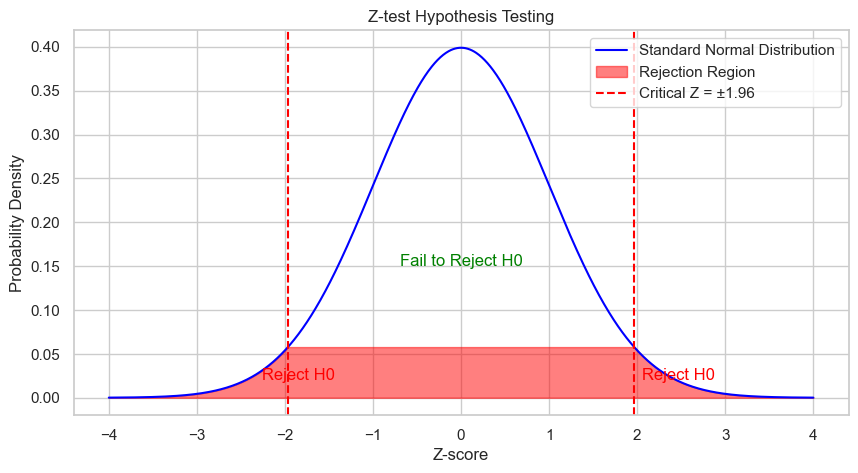

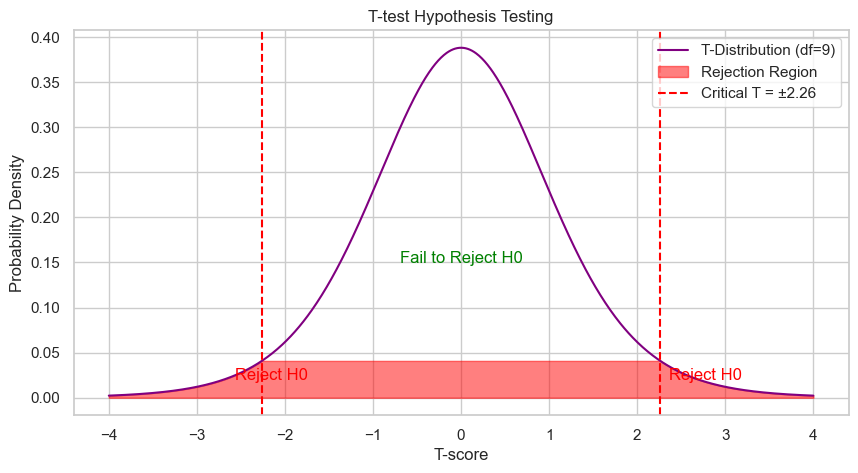

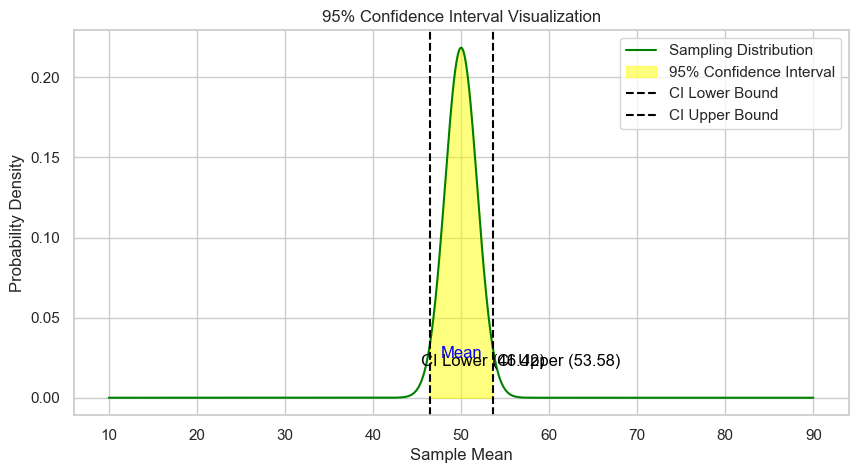

In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set global style
sns.set(style="whitegrid")

### 1) Z-test Visualization (Normal Distribution)
z = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z, 0, 1)  # Standard normal distribution

z_critical = stats.norm.ppf(0.975)  # 2-tailed Z critical value for alpha=0.05
reject_region = z[np.abs(z) > z_critical]

plt.figure(figsize=(10, 5))
sns.lineplot(x=z, y=pdf, label="Standard Normal Distribution", color='blue')

# Highlight rejection regions in red
plt.fill_between(reject_region, stats.norm.pdf(reject_region), alpha=0.5, color="red", label="Rejection Region")
plt.axvline(-z_critical, color='red', linestyle="--", label="Critical Z = ±{:.2f}".format(z_critical))
plt.axvline(z_critical, color='red', linestyle="--")

# Labeling regions
plt.text(-z_critical - 0.3, 0.02, "Reject H0", fontsize=12, color="red")
plt.text(z_critical + 0.1, 0.02, "Reject H0", fontsize=12, color="red")
plt.text(0, 0.15, "Fail to Reject H0", fontsize=12, color="green", ha='center')

plt.title("Z-test Hypothesis Testing")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


### 2) T-test Visualization (T-Distribution)
t_values = np.linspace(-4, 4, 1000)
t_pdf = stats.t.pdf(t_values, df=9)

t_critical = stats.t.ppf(0.975, df=9)  # 2-tailed T critical value for df=9
reject_region_t = t_values[np.abs(t_values) > t_critical]

plt.figure(figsize=(10, 5))
sns.lineplot(x=t_values, y=t_pdf, label="T-Distribution (df=9)", color='purple')

# Highlight rejection regions
plt.fill_between(reject_region_t, stats.t.pdf(reject_region_t, df=9), alpha=0.5, color="red", label="Rejection Region")
plt.axvline(-t_critical, color='red', linestyle="--", label="Critical T = ±{:.2f}".format(t_critical))
plt.axvline(t_critical, color='red', linestyle="--")

# Labeling regions
plt.text(-t_critical - 0.3, 0.02, "Reject H0", fontsize=12, color="red")
plt.text(t_critical + 0.1, 0.02, "Reject H0", fontsize=12, color="red")
plt.text(0, 0.15, "Fail to Reject H0", fontsize=12, color="green", ha='center')

plt.title("T-test Hypothesis Testing")
plt.xlabel("T-score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


### 3) Confidence Interval Visualization
mean = 50  # Sample mean
std = 10  # Standard deviation
n = 30  # Sample size

# Compute Confidence Interval
margin_error = stats.norm.ppf(0.975) * (std / np.sqrt(n))
ci_lower, ci_upper = mean - margin_error, mean + margin_error

x_vals = np.linspace(mean - 4*std, mean + 4*std, 1000)
y_vals = stats.norm.pdf(x_vals, mean, std/np.sqrt(n))

plt.figure(figsize=(10, 5))
sns.lineplot(x=x_vals, y=y_vals, label="Sampling Distribution", color="green")

# Confidence Interval Shading
plt.fill_between(x_vals, y_vals, where=(x_vals >= ci_lower) & (x_vals <= ci_upper), color="yellow", alpha=0.5, label="95% Confidence Interval")
plt.axvline(ci_lower, color="black", linestyle="--", label="CI Lower Bound")
plt.axvline(ci_upper, color="black", linestyle="--", label="CI Upper Bound")

# Labeling CI bounds
plt.text(ci_lower - 1, 0.02, f"CI Lower ({ci_lower:.2f})", fontsize=12, color="black")
plt.text(ci_upper + 0.5, 0.02, f"CI Upper ({ci_upper:.2f})", fontsize=12, color="black")
plt.text(mean, 0.025, "Mean", fontsize=12, color="blue", ha='center')

plt.title("95% Confidence Interval Visualization")
plt.xlabel("Sample Mean")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


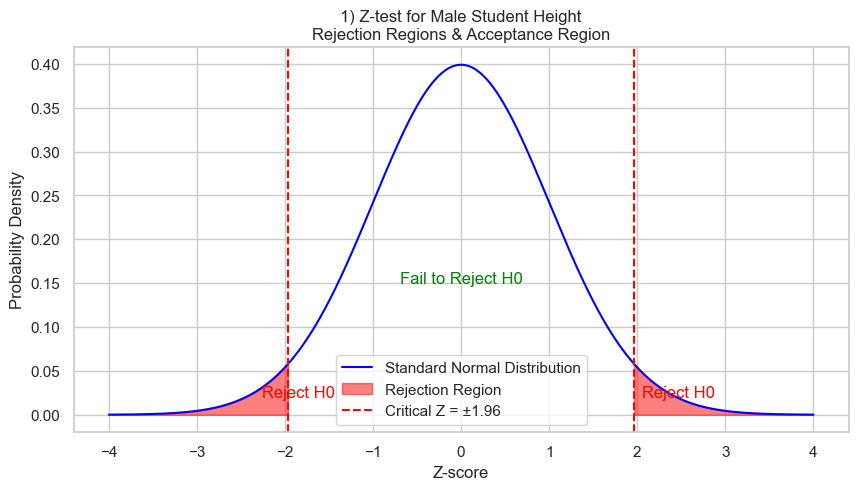

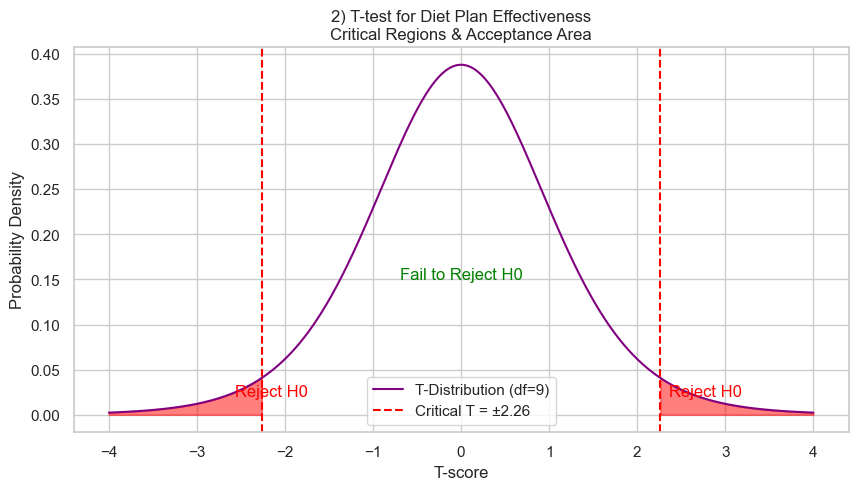

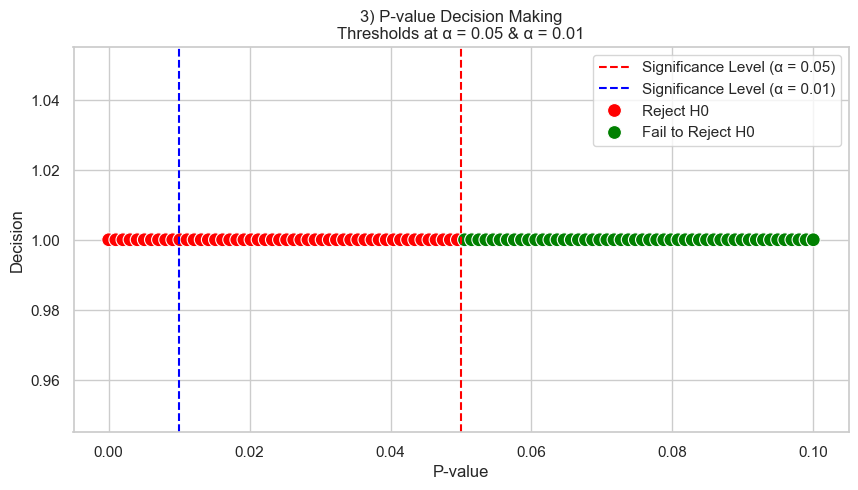

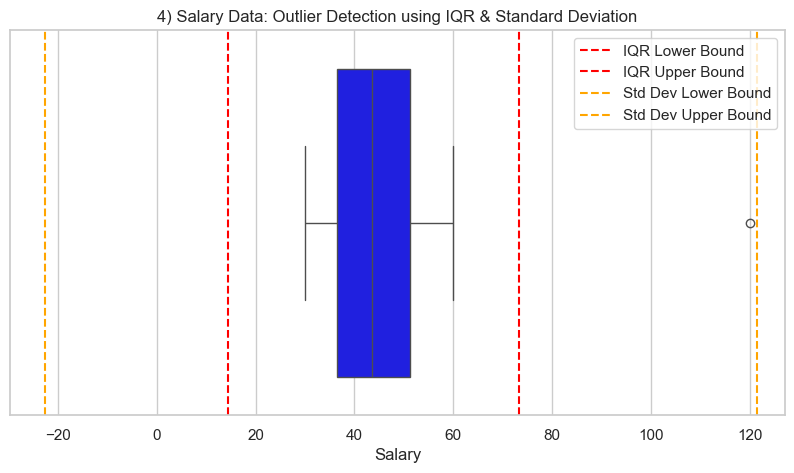

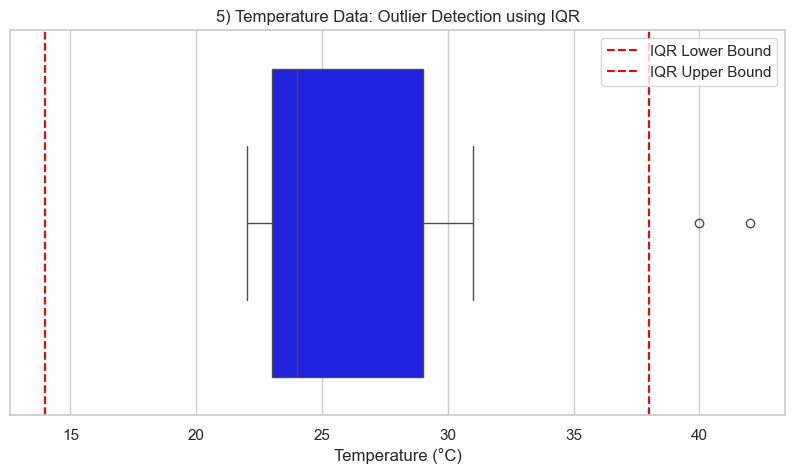

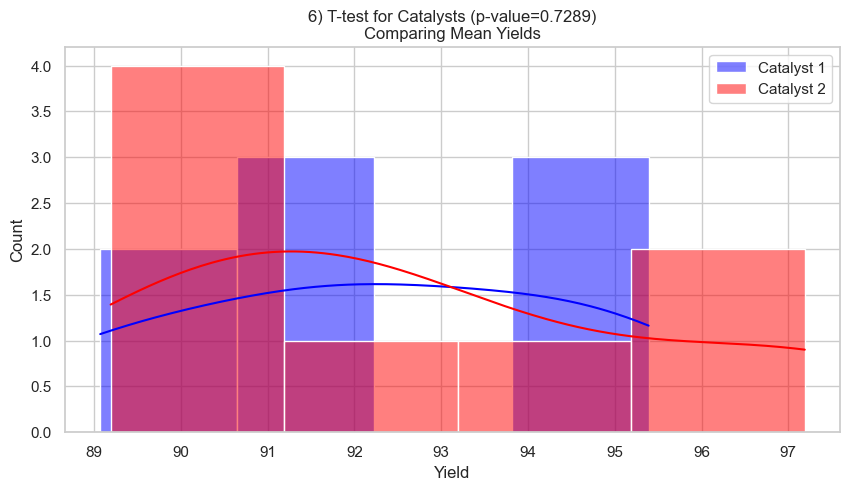

In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

### 1) Z-test for Male Student Height
z = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z, 0, 1)  

z_critical = stats.norm.ppf(0.975)  # Two-tailed Z critical value (α=0.05)

plt.figure(figsize=(10, 5))
sns.lineplot(x=z, y=pdf, label="Standard Normal Distribution", color='blue')

# Highlight rejection regions
plt.fill_between(z[z > z_critical], stats.norm.pdf(z[z > z_critical]), alpha=0.5, color="red", label="Rejection Region")
plt.fill_between(z[z < -z_critical], stats.norm.pdf(z[z < -z_critical]), alpha=0.5, color="red")

# Critical values
plt.axvline(-z_critical, color='red', linestyle="--", label=f"Critical Z = ±{z_critical:.2f}")
plt.axvline(z_critical, color='red', linestyle="--")

# Labels
plt.text(-z_critical-0.3, 0.02, "Reject H0", fontsize=12, color="red")
plt.text(z_critical+0.1, 0.02, "Reject H0", fontsize=12, color="red")
plt.text(0, 0.15, "Fail to Reject H0", fontsize=12, color="green", ha='center')

plt.title("1) Z-test for Male Student Height\nRejection Regions & Acceptance Region")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


### 2) T-test for Diet Plan Effectiveness
t_values = np.linspace(-4, 4, 1000)
t_pdf = stats.t.pdf(t_values, df=9)

t_critical = stats.t.ppf(0.975, df=9)  # Two-tailed T critical value

plt.figure(figsize=(10, 5))
sns.lineplot(x=t_values, y=t_pdf, label="T-Distribution (df=9)", color='purple')

# Highlight rejection regions
plt.fill_between(t_values[t_values > t_critical], stats.t.pdf(t_values[t_values > t_critical], df=9), alpha=0.5, color="red")
plt.fill_between(t_values[t_values < -t_critical], stats.t.pdf(t_values[t_values < -t_critical], df=9), alpha=0.5, color="red")

plt.axvline(-t_critical, color='red', linestyle="--", label=f"Critical T = ±{t_critical:.2f}")
plt.axvline(t_critical, color='red', linestyle="--")

# Labels
plt.text(-t_critical-0.3, 0.02, "Reject H0", fontsize=12, color="red")
plt.text(t_critical+0.1, 0.02, "Reject H0", fontsize=12, color="red")
plt.text(0, 0.15, "Fail to Reject H0", fontsize=12, color="green", ha='center')

plt.title("2) T-test for Diet Plan Effectiveness\nCritical Regions & Acceptance Area")
plt.xlabel("T-score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


### 3) P-value Decision Making
p_values = np.linspace(0, 0.1, 100)
decision = ["Reject H0" if p < 0.05 else "Fail to Reject H0" for p in p_values]

plt.figure(figsize=(10, 5))
plt.axvline(0.05, color="red", linestyle="--", label="Significance Level (α = 0.05)")
plt.axvline(0.01, color="blue", linestyle="--", label="Significance Level (α = 0.01)")
sns.scatterplot(x=p_values, y=[1]*len(p_values), hue=decision, palette={"Reject H0": "red", "Fail to Reject H0": "green"}, s=100)

plt.title("3) P-value Decision Making\nThresholds at α = 0.05 & α = 0.01")
plt.xlabel("P-value")
plt.ylabel("Decision")
plt.legend()
plt.show()


### 4) Salary Outliers using IQR & Standard Deviation
salaries = np.array([30, 32, 35, 37, 40, 42, 45, 47, 50, 55, 60, 120])

Q1, Q3 = np.percentile(salaries, [25, 75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

mean_salary, std_salary = np.mean(salaries), np.std(salaries, ddof=1)
std_lower, std_upper = mean_salary - 3 * std_salary, mean_salary + 3 * std_salary

plt.figure(figsize=(10, 5))
sns.boxplot(x=salaries, color="blue")

plt.axvline(lower_bound, color="red", linestyle="--", label="IQR Lower Bound")
plt.axvline(upper_bound, color="red", linestyle="--", label="IQR Upper Bound")
plt.axvline(std_lower, color="orange", linestyle="--", label="Std Dev Lower Bound")
plt.axvline(std_upper, color="orange", linestyle="--", label="Std Dev Upper Bound")

plt.title("4) Salary Data: Outlier Detection using IQR & Standard Deviation")
plt.xlabel("Salary")
plt.legend()
plt.show()


### 5) Temperature Outliers using IQR
temperatures = np.array([22, 24, 23, 25, 26, 24, 23, 22, 23, 24, 30, 31, 40, 42])

Q1, Q3 = np.percentile(temperatures, [25, 75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

plt.figure(figsize=(10, 5))
sns.boxplot(x=temperatures, color="blue")

plt.axvline(lower_bound, color="red", linestyle="--", label="IQR Lower Bound")
plt.axvline(upper_bound, color="red", linestyle="--", label="IQR Upper Bound")

plt.title("5) Temperature Data: Outlier Detection using IQR")
plt.xlabel("Temperature (°C)")
plt.legend()
plt.show()


### 6) T-test for Catalyst Comparison
catalyst_1 = np.array([91.5, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21])
catalyst_2 = np.array([89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75])

t_stat, p_value = stats.ttest_ind(catalyst_1, catalyst_2, equal_var=True)

plt.figure(figsize=(10, 5))
sns.histplot(catalyst_1, kde=True, color="blue", label="Catalyst 1", alpha=0.5)
sns.histplot(catalyst_2, kde=True, color="red", label="Catalyst 2", alpha=0.5)

plt.title(f"6) T-test for Catalysts (p-value={p_value:.4f})\nComparing Mean Yields")
plt.xlabel("Yield")
plt.legend()
plt.show()


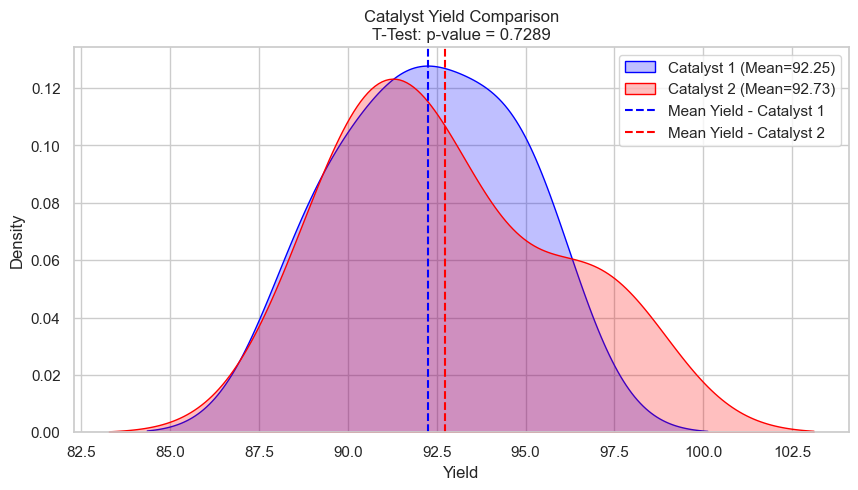

In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Data for two catalysts
catalyst_1 = np.array([91.5, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21])
catalyst_2 = np.array([89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75])

# Mean and Standard Deviation
mean_1, std_1 = np.mean(catalyst_1), np.std(catalyst_1, ddof=1)
mean_2, std_2 = np.mean(catalyst_2), np.std(catalyst_2, ddof=1)

# Perform T-test
t_stat, p_value = stats.ttest_ind(catalyst_1, catalyst_2, equal_var=True)

# ---- PLOT 2: Distribution of Yields ----
plt.figure(figsize=(10, 5))
sns.kdeplot(catalyst_1, fill=True, color="blue", label=f"Catalyst 1 (Mean={mean_1:.2f})")
sns.kdeplot(catalyst_2, fill=True, color="red", label=f"Catalyst 2 (Mean={mean_2:.2f})")

# Show mean values as vertical lines
plt.axvline(mean_1, color="blue", linestyle="--", label="Mean Yield - Catalyst 1")
plt.axvline(mean_2, color="red", linestyle="--", label="Mean Yield - Catalyst 2")

# Title and labels
plt.title(f"Catalyst Yield Comparison\nT-Test: p-value = {p_value:.4f}")
plt.xlabel("Yield")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
